In [7]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
df = pd.read_excel (r'C:\Users\Igor_Leuchyk\Desktop\Useful_materials\Personal\RD_DS\DFs\data.xls')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
...,...,...,...,...,...
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2415.000000,2415.000000,2415.000000,2415.000000
mean,6.470257,3.963540,4.616911,2.189752
std,2.140522,1.022686,1.987028,1.046936
min,-10.000000,0.000000,0.000000,0.000000
25%,5.950000,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [10]:
#how can sepal_legth be less than zero (see the min values)?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2415 non-null   float64
 1   sepal_width   2415 non-null   float64
 2   petal_length  2415 non-null   float64
 3   petal_width   2415 non-null   float64
 4   species       2424 non-null   object 
dtypes: float64(4), object(1)
memory usage: 94.8+ KB


In [12]:
# we can say that first 4 columns ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] are numerical, the 5th one ('species') contains object (text)

In [13]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2419,False,False,False,False,False
2420,False,False,False,False,False
2421,False,False,False,False,False
2422,False,False,False,False,False


In [14]:
# here we can hardly say what rows contain nulls

In [15]:
df.isna().any()

sepal_length     True
sepal_width      True
petal_length     True
petal_width      True
species         False
dtype: bool

In [16]:
#here we can see that we have NAs in first 4 columns ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [17]:
exact_NAs = df[df.isna().any(axis = 1)]

In [18]:
print(exact_NAs)

      sepal_length  sepal_width  petal_length  petal_width         species
17             NaN          NaN           NaN          NaN     Iris-setosa
50             NaN          NaN           NaN          NaN  Iris-virginica
293            NaN          NaN           NaN          NaN     Iris-setosa
302            NaN          NaN           NaN          NaN  Iris-virginica
318            NaN          NaN           NaN          NaN     Iris-setosa
1179           NaN          NaN           NaN          NaN  Iris-virginica
1792           NaN          NaN           NaN          NaN     Iris-setosa
1808           NaN          NaN           NaN          NaN     Iris-setosa
1817           NaN          NaN           NaN          NaN  Iris-virginica


In [19]:
# we've detected exact rows with NAs

In [20]:
df1 = df.fillna(df.mean(numeric_only = True), limit = 5, axis = 0)

In [21]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
...,...,...,...,...,...
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


In [22]:
df1.isna().any()

sepal_length     True
sepal_width      True
petal_length     True
petal_width      True
species         False
dtype: bool

In [23]:
# we can see that first 4 columns still have NAs. We'll find out which rows do have NAs
exact_NAs1 = df1[df1.isna().any(axis = 1)]

In [24]:
print(exact_NAs1)

      sepal_length  sepal_width  petal_length  petal_width         species
1179           NaN          NaN           NaN          NaN  Iris-virginica
1792           NaN          NaN           NaN          NaN     Iris-setosa
1808           NaN          NaN           NaN          NaN     Iris-setosa
1817           NaN          NaN           NaN          NaN  Iris-virginica


In [25]:
# NAs are not detected in [0:999] rows

In [26]:
df2 = df.fillna(method = 'ffill', limit = 4, axis = 0)

In [27]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
...,...,...,...,...,...
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


In [28]:
df2.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2419,False,False,False,False,False
2420,False,False,False,False,False
2421,False,False,False,False,False
2422,False,False,False,False,False


In [29]:
df2.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [30]:
#df2 hasn't got NAs already. I'm going to use "bfill" method just to look how it works

In [31]:
df3 = df.fillna(method = 'bfill', axis = 0)

In [32]:
df3

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
...,...,...,...,...,...
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


In [38]:
df3.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [39]:
# as we can see "bfill" method has replaced all NAs with next valid observations

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2424 non-null   float64
 1   sepal_width   2424 non-null   float64
 2   petal_length  2424 non-null   float64
 3   petal_width   2424 non-null   float64
 4   species       2424 non-null   object 
dtypes: float64(4), object(1)
memory usage: 94.8+ KB


In [41]:
df3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2424.000000,2424.000000,2424.000000,2424.000000
mean,6.470231,3.963271,4.612908,2.187125
std,2.138273,1.021824,1.988336,1.048271
min,-10.000000,0.000000,0.000000,0.000000
25%,5.947500,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [42]:
# after these manipulations I can assume that "count" for all the columns has increased from 2415 to 2424,
# also Standard Deviation ("std") has changed: ('sepal_length' - decreased, 'sepal_width' - decreased, 'petal_length' - increased, 'petal_width' - increased)
# And min for "sepal_length" is still below zero. I guess that it is an error in the default DB

In [43]:
import seaborn as sb

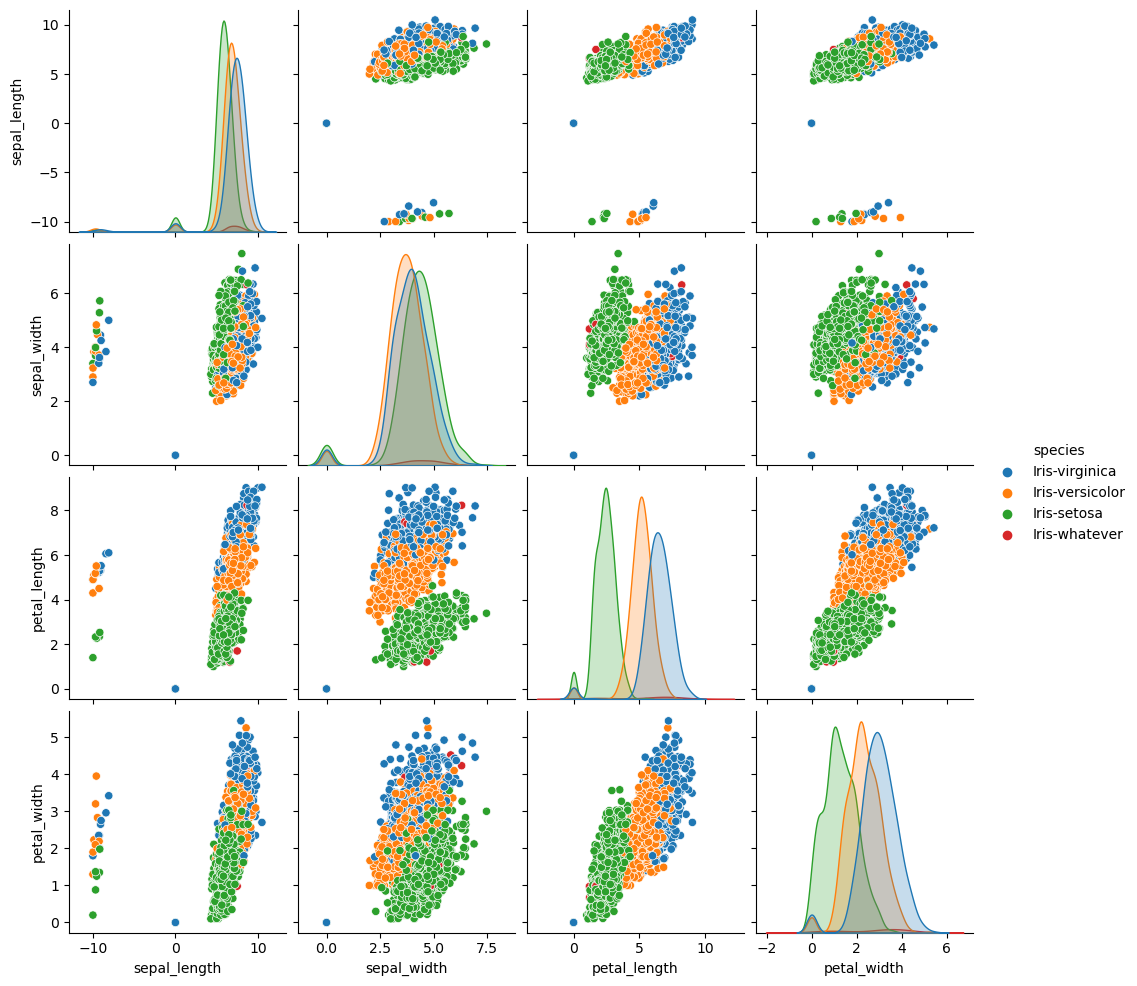

In [44]:
sb.pairplot(df3, hue = 'species')

In [45]:
# according to graphics above, petal_width has linear dependence on petal_length

In [46]:
X = df3.drop(labels = ['petal_width', 'species'], axis = 1)
Y = df3['petal_width']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.4, random_state = 101)

In [49]:
X_train

,sepal_length,sepal_width,petal_length
1032,6.13,4.27,5.00
1678,7.28,3.78,5.23
1067,5.68,3.28,2.96
1469,7.55,3.89,5.17
1481,6.94,3.38,5.66
...,...,...,...
599,4.94,3.57,1.25
1599,-9.01,4.25,5.52
1361,7.01,2.38,4.46
1547,7.18,3.92,5.46


In [50]:
X_test

,sepal_length,sepal_width,petal_length
1522,8.13,3.66,7.49
814,5.83,2.85,4.84
1800,7.18,6.48,2.79
1971,6.35,3.38,4.91
209,5.47,3.74,1.84
...,...,...,...
68,6.74,2.87,5.01
182,6.94,3.10,6.02
1079,5.91,4.40,4.82
850,6.36,3.16,4.65


In [51]:
Y_train

1032    3.14
1678    2.69
1067    0.96
1469    1.94
1481    1.99
        ... 
599     0.96
1599    2.75
1361    2.08
1547    3.58
863     2.03
Name: petal_width, Length: 1454, dtype: float64

In [52]:
Y_test

1522    3.92
814     1.28
1800    2.00
1971    1.62
209     0.29
        ... 
68      2.37
182     2.91
1079    2.97
850     2.20
70      2.88
Name: petal_width, Length: 970, dtype: float64

In [53]:
from sklearn.linear_model import LinearRegression
linear_regr = LinearRegression()

In [54]:
linear_regr.fit(X_train, Y_train)

LinearRegression()

In [55]:
linear_regr.predict(X_test)
pred = linear_regr.predict(X_test)

In [56]:
pred

array([ 3.32797625,  2.06733102,  1.98518124,  2.20692652,  1.01487012,
        1.36262039,  2.95302762,  1.00968116,  2.79704523,  2.47239623,
        2.73991415,  3.31037141,  1.44331797,  1.15971162,  2.97264176,
        1.99130379,  2.91442998, -0.51968246,  2.49984086,  1.85609915,
        2.32785391,  1.7020337 ,  0.96744788,  1.9593304 ,  4.12392798,
        3.62637531,  3.20471836,  2.81462045,  2.36002351,  2.90693805,
        3.49536501,  1.41542485,  2.48650054,  1.18977548,  1.72633853,
        2.27481173,  2.53474937,  2.93147228,  3.88561475,  3.80060326,
        1.8512556 ,  0.6777547 ,  3.45485725,  2.51134307,  2.23636066,
        1.60471132,  3.62733855,  0.48838025,  2.15457996,  2.46014087,
        2.90673931,  0.94677167,  2.65245721,  1.43085347,  1.67590692,
        0.83477753,  1.37874192,  3.02731703,  2.24456786,  3.19994714,
        2.70858359,  1.37463657,  0.74007721,  2.25089664,  2.04762425,
        2.5032137 ,  1.74373975,  2.04286171,  2.38682811,  2.92

In [57]:
#As I can assume, my linear regression works +/- correctly (not with 100% accuracy but works)
#As I can see: the bigger the petal_length - the bigger petal_width